# Example Frame of our project

Import libraries, env setting. TODO: need to clear unused ones

In [1]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style = 'whitegrid',color_codes = True)

#model selection
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,ConfusionMatrixDisplay,classification_report,roc_curve,roc_auc_score, f1_score
from sklearn.preprocessing import LabelEncoder
#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential, Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.applications.vgg16 import VGG16

import tensorflow as tf
import random as rn
import keras.callbacks as kcallbacks

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
# cv2： OpenCV-Python
import cv2                  
import numpy as np  
#from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

The first step is to load the iris dataset using the dataset_prep function

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
def dataset_prep(flower_name_list, train_or_test): 
    #IMG_SIZE=224 #150
    folder_name = '/content/drive/MyDrive/archive'
    #folder_name = '/content/drive/MyDrive/ML_Proj/example_modify_dataset'
    
    for flower_name in flower_name_list:
        Opt_DataCnt = 0
        full_path = os.path.join(folder_name, train_or_test, flower_name)
        #full_path = folder_name + '/' + data_type + '/' + flower_type

        # os.listdir: get all files under DIR
        for pic in os.listdir(full_path):
            #label=assign_label(img,flower_type)
            pic_path = os.path.join(full_path,pic) #full_path + '/' + pic
            # read img from path with default setting 'IMREAD_COLOR'
            this_pic = cv2.imread(pic_path, cv2.IMREAD_COLOR)
            this_pic = cv2.resize(this_pic, (IMG_SIZE, IMG_SIZE))
            if(train_or_test == 'train'):
                X_train.append(np.array(this_pic))
                y_train.append(str(flower_name))
                if(Opt_DataCnt < 200):
                    X_validation.append(np.array(this_pic))
                    y_validation.append(str(flower_name))
            elif(train_or_test == 'test'):
                X_test.append(np.array(this_pic))
                y_test.append(str(flower_name))
            else:
                print("Error! input 'train_or_test'-{0} is not supported!".format(train_or_test))
                break
            Opt_DataCnt += 1
        print("Finish processing {0}\nX_train's size: {1:5d}\tX_test's size: {2}\
        y_train's size: {3:5d}\ty_test's size: {4}\n".format(flower_name, len(X_train), len(X_test), len(y_train), len(y_test)))

In [4]:
X_train = []
X_test = []
y_train = []
y_test = []
X_validation = []
y_validation = []
IMG_SIZE = 224 #225
INPUT_SIZE = (IMG_SIZE, IMG_SIZE, 3)
    
flower_name_list = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
dataset_prep(flower_name_list, 'train')
print("\n")
dataset_prep(flower_name_list, 'test')

Finish processing daisy
X_train's size:   754	X_test's size: 0        y_train's size:   754	y_test's size: 0

Finish processing dandelion
X_train's size:  1796	X_test's size: 0        y_train's size:  1796	y_test's size: 0

Finish processing rose
X_train's size:  2570	X_test's size: 0        y_train's size:  2570	y_test's size: 0

Finish processing sunflower
X_train's size:  3293	X_test's size: 0        y_train's size:  3293	y_test's size: 0

Finish processing tulip
X_train's size:  4267	X_test's size: 0        y_train's size:  4267	y_test's size: 0



Finish processing daisy
X_train's size:  4267	X_test's size: 10        y_train's size:  4267	y_test's size: 10

Finish processing dandelion
X_train's size:  4267	X_test's size: 20        y_train's size:  4267	y_test's size: 20

Finish processing rose
X_train's size:  4267	X_test's size: 30        y_train's size:  4267	y_test's size: 30

Finish processing sunflower
X_train's size:  4267	X_test's size: 40        y_train's size:  4267	y_tes

Split datasets. TODO: suggest to manually move 50 images in test folder into train folder 

In [5]:
#X_train, X_test_2, y_train, y_test_2 = train_test_split(X_train, y_train, test_size=0.1, random_state=42) #shuffle?
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.3, random_state = 42) 

In [ ]:
# you can enable this part if you want to add 50 more images to test datasets
#X_test.extend(X_test_2)
#y_test.extend(y_test_2)

In [ ]:
#print("Extend X_test's size to: {0}. Extend y_test's size to: {1}".format(len(X_test),len(y_test)))

Data pre-processing.

In [6]:
def XY_prep(X, y): 
    # label encoding
    le = LabelEncoder()
    y_labeled = le.fit_transform(y)
    # transform Y to binary one-hot encoding
    y_coded = to_categorical(y_labeled, 5)

    X = np.array(X)
    # Convergence, scaling the pixel values between [0, 1], avoids neuron fall into 'death zone'
    X_coded = X / 255
    return X_coded, y_coded, y_labeled, le

In [7]:
print('train:')
print(np.shape(X_train))
print(np.shape(y_train))
print('test:')
print(np.shape(X_test))
print(np.shape(y_test))
print('train_HPO:')
print(np.shape(X_validation))
print(np.shape(y_validation))

train:
(2986, 224, 224, 3)
(2986,)
test:
(1281, 224, 224, 3)
(1281,)
train_HPO:
(1000, 224, 224, 3)
(1000,)


In [8]:
X_train_coded, y_train_coded, y_train_labeled, le_train = XY_prep(X_train, y_train)
X_test_coded, y_test_coded, y_test_labeled, le_test = XY_prep(X_test, y_test)
X_validation_coded, y_validation_coded, y_validation_labeled, le_validation = XY_prep(X_validation, y_validation)

In [9]:
print('train_coded:')
print(np.shape(X_train_coded))
print(np.shape(y_train_coded))
print('test_coded:')
print(np.shape(X_test_coded))
print(np.shape(y_test_coded))
print('train_HPO_coded:')
print(np.shape(X_validation_coded))
print(np.shape(y_validation_coded))

train_coded:
(2986, 224, 224, 3)
(2986, 5)
test_coded:
(1281, 224, 224, 3)
(1281, 5)
train_HPO_coded:
(1000, 224, 224, 3)
(1000, 5)


Now that we have scaled our features, it's time to create our model.

In [10]:
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

In [11]:
def Random_Search_VGG16_Also_Train(epochs=20,
                                   patience = 2,
                                   frozen=11,
                                   learning_rate = 0.001, 
                                   verbose=1):
    
    vgg16_model = VGG16(input_shape = INPUT_SIZE, weights = "imagenet", 
                        include_top = False)

    #the number of frozen layers for transfer learning, have tuned from 5-18
    for layer in vgg16_model.layers[:frozen]:	
        layer.trainable = False
    for layer in vgg16_model.layers[frozen:]:
        layer.trainable = True

    Add_model = Sequential()
    Add_model.add(MaxPooling2D(input_shape = vgg16_model.output_shape[1:], pool_size = (2, 2), strides = (2, 2)))
    Add_model.add(Conv2D(filters = 512, kernel_size = (3, 3), padding = "same", activation = "LeakyReLU"))

    Add_model.add(Flatten())
    Add_model.add(Dense(units = 500, activation = "relu"))
    Add_model.add(Dense(5, activation = 'softmax'))
    TL_model = Model(inputs = vgg16_model.input, outputs = Add_model(vgg16_model.output), name = 'VGG16_TransferLearning')
    
    # 2. train model
    ###
    batch_size = 128

    earlyStopping = kcallbacks.EarlyStopping(monitor = 'val_acc', patience = patience, verbose = verbose, mode = 'auto')

    datagen = ImageDataGenerator(
        featurewise_center = False,  # set input mean to 0 over the dataset
        samplewise_center = False,  # set each sample mean to 0
        featurewise_std_normalization = False,  # divide inputs by std of the dataset
        samplewise_std_normalization = False,  # divide each input by its std
        zca_whitening = False,  # apply ZCA whitening
        rotation_range = 10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range = 0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range = 0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip = False)  # randomly flip images

    datagen.fit(X_train_coded)
 
    # compile the model specifying an optimizer and a loss function
    opt = Adam(lr = learning_rate, beta_1 = 0.9, beta_2 = 0.999, epsilon = 1e-08)	#tuned learning rate to be 0.001
    TL_model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])	#set the loss function to be binary crossentropy
    
    ### 
    hist = TL_model.fit_generator(datagen.flow(X_train_coded,y_train_coded, batch_size = batch_size),
                                  epochs = epochs, 
                                  steps_per_epoch = X_train_coded.shape[0] // batch_size,
                                  validation_data = (X_test_coded,y_test_coded),
                                  validation_steps = X_test_coded.shape[0] // batch_size, 
                                  callbacks = [earlyStopping],
                                  verbose = verbose)

    return hist, TL_model

In [ ]:
this_hist, this_model = Random_Search_VGG16_Also_Train(epochs = 20,
                                                       patience = 2,
                                                       frozen=11,
                                                       learning_rate = 0.001, 
                                                       verbose=1)

In [12]:
#define the objective function to be optimized 
import time
from hyperopt import hp, fmin, tpe, rand, STATUS_OK, Trials
import matplotlib.pyplot as plt
import statistics 
from hyperopt.early_stop import no_progress_loss

def objective(params):
    
    params = {
        'epochs': int(params['epochs']),
        'patience': int(params['patience']),
        'frozen': int(params['frozen']),
        'learning_rate': abs(float(params['learning_rate'])),
    }
    epochs = params['epochs']
    patience = params['patience']
    frozen = params['frozen']
    learning_rate = params['learning_rate']

    this_hist, this_model = Random_Search_VGG16_Also_Train(epochs = epochs, patience = patience, frozen = frozen, learning_rate = learning_rate, verbose = 1)

    # predit
    y_pred = this_model.predict(X_test_coded)
    # get the predict result as label 0-5 from the highest marks
    y_pred_labeled = np.argmax(y_pred,axis=1)
    # convert the y_test from flower type str to label 0-5
    le = LabelEncoder()
    y_test_labeled = le.fit_transform(y_test)

    acc = accuracy_score(y_test_labeled, y_pred_labeled)
    print('accuracy_score:%s'%acc)
    return {'loss': -acc, 'status': STATUS_OK }

In [13]:
space = {
    'epochs': hp.quniform('epochs', 30, 50, 10),
    'patience': hp.quniform('patience', 2, 4, 1),
    'frozen': hp.quniform('frozen',  15, 19, 1),
    'learning_rate': hp.quniform('lr', 0.001, 0.006, 0.001), 
}

early_stop_fn = no_progress_loss(3)


t1 = time.time()
best = fmin(fn = objective,
            space = space,
            algo = tpe.suggest,
            max_evals = 5,
            early_stop_fn = early_stop_fn)

print("Hyperopt estimated optimum {}".format(best))
t2 = time.time()
print("Time: "+ str(t2-t1))

Epoch 1/50

  0%|          | 0/5 [00:54<?, ?trial/s, best loss=?]

23/23 [==============================] - 85s 3s/step - loss: 1.8901 - accuracy: 0.4542 - val_loss: 0.8660 - val_accuracy: 0.6604

Epoch 2/50

  0%|          | 0/5 [02:00<?, ?trial/s, best loss=?]

23/23 [==============================] - 36s 2s/step - loss: 0.7379 - accuracy: 0.7243 - val_loss: 0.6415 - val_accuracy: 0.7674

Epoch 3/50

  0%|          | 0/5 [02:36<?, ?trial/s, best loss=?]

23/23 [==============================] - 36s 2s/step - loss: 0.6117 - accuracy: 0.7743 - val_loss: 0.4900 - val_accuracy: 0.8087

Epoch 4/50

  0%|          | 0/5 [03:12<?, ?trial/s, best loss=?]

23/23 [==============================] - 36s 2s/step - loss: 0.5159 - accuracy: 0.8062 - val_loss: 0.4930 - val_accuracy: 0.8158

Epoch 5/50

  0%|          | 0/5 [03:53<?, ?trial/s, best loss=?]

23/23 [==============================] - 36s 2s/step - loss: 0.4554 - accuracy: 0.8362 - val_loss: 0.4555 - val_accuracy: 0.8329

Epoch 6/50

  0%|          | 0/5 [04:29<?, ?trial/s, best loss=?]

23/23 [==============================] - 36s 2s/step - loss: 0.4253 - accuracy: 0.8408 - val_loss: 0.4624 - val_accuracy: 0.8205

Epoch 7/50

  0%|          | 0/5 [05:06<?, ?trial/s, best loss=?]

23/23 [==============================] - 37s 2s/step - loss: 0.3929 - accuracy: 0.8584 - val_loss: 0.5148 - val_accuracy: 0.8244

Epoch 8/50

  0%|          | 0/5 [05:42<?, ?trial/s, best loss=?]

23/23 [==============================] - 36s 2s/step - loss: 0.4016 - accuracy: 0.8457 - val_loss: 0.4168 - val_accuracy: 0.8345

Epoch 9/50

  0%|          | 0/5 [06:18<?, ?trial/s, best loss=?]

23/23 [==============================] - 41s 2s/step - loss: 0.3479 - accuracy: 0.8642 - val_loss: 0.4512 - val_accuracy: 0.8275

Epoch 10/50

  0%|          | 0/5 [06:58<?, ?trial/s, best loss=?]

23/23 [==============================] - 36s 2s/step - loss: 0.3657 - accuracy: 0.8593 - val_loss: 0.4546 - val_accuracy: 0.8220

Epoch 11/50

  0%|          | 0/5 [07:35<?, ?trial/s, best loss=?]

23/23 [==============================] - 37s 2s/step - loss: 0.3321 - accuracy: 0.8777 - val_loss: 0.5362 - val_accuracy: 0.8205

Epoch 12/50

  0%|          | 0/5 [08:11<?, ?trial/s, best loss=?]

23/23 [==============================] - 36s 2s/step - loss: 0.3332 - accuracy: 0.8793 - val_loss: 0.4194 - val_accuracy: 0.8447

Epoch 13/50

  0%|          | 0/5 [08:48<?, ?trial/s, best loss=?]

23/23 [==============================] - 37s 2s/step - loss: 0.2967 - accuracy: 0.8893 - val_loss: 0.4483 - val_accuracy: 0.8470

Epoch 14/50

  0%|          | 0/5 [09:28<?, ?trial/s, best loss=?]

23/23 [==============================] - 36s 2s/step - loss: 0.2827 - accuracy: 0.8971 - val_loss: 0.4815 - val_accuracy: 0.8283

Epoch 15/50

  0%|          | 0/5 [10:04<?, ?trial/s, best loss=?]

23/23 [==============================] - 36s 2s/step - loss: 0.2928 - accuracy: 0.8940 - val_loss: 0.4329 - val_accuracy: 0.8439

Epoch 16/50

  0%|          | 0/5 [10:39<?, ?trial/s, best loss=?]

23/23 [==============================] - 36s 2s/step - loss: 0.2715 - accuracy: 0.9003 - val_loss: 0.4792 - val_accuracy: 0.8368

Epoch 17/50

  0%|          | 0/5 [11:21<?, ?trial/s, best loss=?]

23/23 [==============================] - 36s 2s/step - loss: 0.2373 - accuracy: 0.9143 - val_loss: 0.5240 - val_accuracy: 0.8275

Epoch 18/50

  0%|          | 0/5 [11:56<?, ?trial/s, best loss=?]

23/23 [==============================] - 35s 2s/step - loss: 0.2543 - accuracy: 0.9034 - val_loss: 0.4812 - val_accuracy: 0.8384

Epoch 19/50

  0%|          | 0/5 [12:32<?, ?trial/s, best loss=?]

23/23 [==============================] - 35s 2s/step - loss: 0.2424 - accuracy: 0.9094 - val_loss: 0.4223 - val_accuracy: 0.8540

Epoch 20/50

  0%|          | 0/5 [13:08<?, ?trial/s, best loss=?]

23/23 [==============================] - 36s 2s/step - loss: 0.2294 - accuracy: 0.9185 - val_loss: 0.4300 - val_accuracy: 0.8486

Epoch 21/50

  0%|          | 0/5 [13:44<?, ?trial/s, best loss=?]

23/23 [==============================] - 36s 2s/step - loss: 0.2299 - accuracy: 0.9167 - val_loss: 0.5251 - val_accuracy: 0.8517

Epoch 22/50

  0%|          | 0/5 [14:20<?, ?trial/s, best loss=?]

23/23 [==============================] - 36s 2s/step - loss: 0.2252 - accuracy: 0.9209 - val_loss: 0.5226 - val_accuracy: 0.8283

Epoch 23/50

  0%|          | 0/5 [14:56<?, ?trial/s, best loss=?]

23/23 [==============================] - 36s 2s/step - loss: 0.2656 - accuracy: 0.8982 - val_loss: 0.5159 - val_accuracy: 0.8314

Epoch 24/50

  0%|          | 0/5 [15:32<?, ?trial/s, best loss=?]

23/23 [==============================] - 36s 2s/step - loss: 0.2388 - accuracy: 0.9118 - val_loss: 0.4232 - val_accuracy: 0.8587

Epoch 25/50

  0%|          | 0/5 [16:08<?, ?trial/s, best loss=?]

23/23 [==============================] - 36s 2s/step - loss: 0.2200 - accuracy: 0.9143 - val_loss: 0.5410 - val_accuracy: 0.8228

Epoch 26/50

  0%|          | 0/5 [16:44<?, ?trial/s, best loss=?]

23/23 [==============================] - 36s 2s/step - loss: 0.1917 - accuracy: 0.9269 - val_loss: 0.5013 - val_accuracy: 0.8361

Epoch 27/50

  0%|          | 0/5 [17:21<?, ?trial/s, best loss=?]

23/23 [==============================] - 36s 2s/step - loss: 0.2080 - accuracy: 0.9195 - val_loss: 0.5153 - val_accuracy: 0.8423

Epoch 28/50

  0%|          | 0/5 [18:02<?, ?trial/s, best loss=?]

23/23 [==============================] - 36s 2s/step - loss: 0.1899 - accuracy: 0.9300 - val_loss: 0.5109 - val_accuracy: 0.8415

Epoch 29/50

  0%|          | 0/5 [18:38<?, ?trial/s, best loss=?]

23/23 [==============================] - 36s 2s/step - loss: 0.1901 - accuracy: 0.9262 - val_loss: 0.5631 - val_accuracy: 0.8392

Epoch 30/50

  0%|          | 0/5 [19:15<?, ?trial/s, best loss=?]

23/23 [==============================] - 37s 2s/step - loss: 0.1800 - accuracy: 0.9332 - val_loss: 0.5089 - val_accuracy: 0.8486

Epoch 31/50

  0%|          | 0/5 [19:50<?, ?trial/s, best loss=?]

23/23 [==============================] - 36s 2s/step - loss: 0.2031 - accuracy: 0.9223 - val_loss: 0.5038 - val_accuracy: 0.8478

Epoch 32/50

  0%|          | 0/5 [20:26<?, ?trial/s, best loss=?]

23/23 [==============================] - 36s 2s/step - loss: 0.1738 - accuracy: 0.9356 - val_loss: 0.5454 - val_accuracy: 0.8400

Epoch 33/50

  0%|          | 0/5 [21:02<?, ?trial/s, best loss=?]

23/23 [==============================] - 36s 2s/step - loss: 0.2030 - accuracy: 0.9258 - val_loss: 0.4536 - val_accuracy: 0.8595

Epoch 34/50

  0%|          | 0/5 [21:38<?, ?trial/s, best loss=?]

23/23 [==============================] - 36s 2s/step - loss: 0.1568 - accuracy: 0.9437 - val_loss: 0.5146 - val_accuracy: 0.8392

Epoch 35/50

  0%|          | 0/5 [22:14<?, ?trial/s, best loss=?]

23/23 [==============================] - 36s 2s/step - loss: 0.1632 - accuracy: 0.9370 - val_loss: 0.4631 - val_accuracy: 0.8657

Epoch 36/50

  0%|          | 0/5 [22:50<?, ?trial/s, best loss=?]

23/23 [==============================] - 36s 2s/step - loss: 0.1206 - accuracy: 0.9542 - val_loss: 0.4964 - val_accuracy: 0.8579

Epoch 37/50

  0%|          | 0/5 [23:26<?, ?trial/s, best loss=?]

23/23 [==============================] - 36s 2s/step - loss: 0.1438 - accuracy: 0.9486 - val_loss: 0.6045 - val_accuracy: 0.8407

Epoch 38/50

  0%|          | 0/5 [24:03<?, ?trial/s, best loss=?]

23/23 [==============================] - 36s 2s/step - loss: 0.1625 - accuracy: 0.9402 - val_loss: 0.4848 - val_accuracy: 0.8587

Epoch 39/50

  0%|          | 0/5 [24:39<?, ?trial/s, best loss=?]

23/23 [==============================] - 36s 2s/step - loss: 0.1376 - accuracy: 0.9507 - val_loss: 0.4967 - val_accuracy: 0.8400

Epoch 40/50

  0%|          | 0/5 [25:15<?, ?trial/s, best loss=?]

23/23 [==============================] - 36s 2s/step - loss: 0.1338 - accuracy: 0.9514 - val_loss: 0.5696 - val_accuracy: 0.8478

Epoch 41/50

  0%|          | 0/5 [25:52<?, ?trial/s, best loss=?]

23/23 [==============================] - 37s 2s/step - loss: 0.1153 - accuracy: 0.9549 - val_loss: 0.5803 - val_accuracy: 0.8517

Epoch 42/50

  0%|          | 0/5 [26:28<?, ?trial/s, best loss=?]

23/23 [==============================] - 36s 2s/step - loss: 0.0999 - accuracy: 0.9615 - val_loss: 0.5674 - val_accuracy: 0.8532

Epoch 43/50

  0%|          | 0/5 [27:05<?, ?trial/s, best loss=?]

23/23 [==============================] - 36s 2s/step - loss: 0.1378 - accuracy: 0.9454 - val_loss: 0.5928 - val_accuracy: 0.8486

Epoch 44/50

  0%|          | 0/5 [27:41<?, ?trial/s, best loss=?]

23/23 [==============================] - 36s 2s/step - loss: 0.1404 - accuracy: 0.9528 - val_loss: 0.6041 - val_accuracy: 0.8423

Epoch 45/50

  0%|          | 0/5 [28:17<?, ?trial/s, best loss=?]

23/23 [==============================] - 36s 2s/step - loss: 0.1360 - accuracy: 0.9479 - val_loss: 0.5556 - val_accuracy: 0.8517

Epoch 46/50

  0%|          | 0/5 [28:54<?, ?trial/s, best loss=?]

23/23 [==============================] - 36s 2s/step - loss: 0.1359 - accuracy: 0.9482 - val_loss: 0.6033 - val_accuracy: 0.8486

Epoch 47/50

  0%|          | 0/5 [29:30<?, ?trial/s, best loss=?]

23/23 [==============================] - 37s 2s/step - loss: 0.1199 - accuracy: 0.9615 - val_loss: 0.6031 - val_accuracy: 0.8415

Epoch 48/50

  0%|          | 0/5 [30:07<?, ?trial/s, best loss=?]

23/23 [==============================] - 37s 2s/step - loss: 0.1316 - accuracy: 0.9500 - val_loss: 0.5659 - val_accuracy: 0.8478

Epoch 49/50

  0%|          | 0/5 [30:43<?, ?trial/s, best loss=?]

23/23 [==============================] - 36s 2s/step - loss: 0.1218 - accuracy: 0.9563 - val_loss: 0.5727 - val_accuracy: 0.8478

Epoch 50/50

  0%|          | 0/5 [31:20<?, ?trial/s, best loss=?]

23/23 [==============================] - 36s 2s/step - loss: 0.1034 - accuracy: 0.9636 - val_loss: 0.6152 - val_accuracy: 0.8470

41/41 [==============================] - 11s 144ms/step

accuracy_score:0.8469945355191257
Epoch 1/50

 20%|██        | 1/5 [32:12<2:06:33, 1898.32s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 38s 2s/step - loss: 21.1190 - accuracy: 0.2526 - val_loss: 1.9366 - val_accuracy: 0.3505

Epoch 2/50

 20%|██        | 1/5 [32:50<2:06:33, 1898.32s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 36s 2s/step - loss: 1.3653 - accuracy: 0.4878 - val_loss: 0.9099 - val_accuracy: 0.6315

Epoch 3/50

 20%|██        | 1/5 [33:26<2:06:33, 1898.32s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 37s 2s/step - loss: 0.9293 - accuracy: 0.6533 - val_loss: 0.7845 - val_accuracy: 0.7034

Epoch 4/50

 20%|██        | 1/5 [34:02<2:06:33, 1898.32s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 36s 2s/step - loss: 0.7753 - accuracy: 0.7243 - val_loss: 0.7682 - val_accuracy: 0.7143

Epoch 5/50

 20%|██        | 1/5 [34:39<2:06:33, 1898.32s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 37s 2s/step - loss: 0.7290 - accuracy: 0.7344 - val_loss: 0.6431 - val_accuracy: 0.7658

Epoch 6/50

 20%|██        | 1/5 [35:15<2:06:33, 1898.32s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 36s 2s/step - loss: 0.6346 - accuracy: 0.7719 - val_loss: 0.5551 - val_accuracy: 0.7884

Epoch 7/50

 20%|██        | 1/5 [35:51<2:06:33, 1898.32s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 36s 2s/step - loss: 0.5474 - accuracy: 0.8030 - val_loss: 0.5215 - val_accuracy: 0.7986

Epoch 8/50

 20%|██        | 1/5 [36:28<2:06:33, 1898.32s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 37s 2s/step - loss: 0.5542 - accuracy: 0.7863 - val_loss: 0.5428 - val_accuracy: 0.7916

Epoch 9/50

 20%|██        | 1/5 [37:04<2:06:33, 1898.32s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 36s 2s/step - loss: 0.4880 - accuracy: 0.8237 - val_loss: 0.4828 - val_accuracy: 0.8095

Epoch 10/50

 20%|██        | 1/5 [37:40<2:06:33, 1898.32s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 36s 2s/step - loss: 0.5113 - accuracy: 0.8167 - val_loss: 0.4617 - val_accuracy: 0.8181

Epoch 11/50

 20%|██        | 1/5 [38:16<2:06:33, 1898.32s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 36s 2s/step - loss: 0.4524 - accuracy: 0.8289 - val_loss: 0.4620 - val_accuracy: 0.8197

Epoch 12/50

 20%|██        | 1/5 [38:51<2:06:33, 1898.32s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 36s 2s/step - loss: 0.4401 - accuracy: 0.8418 - val_loss: 0.4313 - val_accuracy: 0.8384

Epoch 13/50

 20%|██        | 1/5 [39:28<2:06:33, 1898.32s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 36s 2s/step - loss: 0.4518 - accuracy: 0.8331 - val_loss: 0.4704 - val_accuracy: 0.8290

Epoch 14/50

 20%|██        | 1/5 [40:04<2:06:33, 1898.32s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 36s 2s/step - loss: 0.4140 - accuracy: 0.8422 - val_loss: 0.4330 - val_accuracy: 0.8306

Epoch 15/50

 20%|██        | 1/5 [40:40<2:06:33, 1898.32s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 36s 2s/step - loss: 0.4338 - accuracy: 0.8429 - val_loss: 0.5005 - val_accuracy: 0.8165

Epoch 16/50

 20%|██        | 1/5 [41:16<2:06:33, 1898.32s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 37s 2s/step - loss: 0.4408 - accuracy: 0.8362 - val_loss: 0.4662 - val_accuracy: 0.8251

Epoch 17/50

 20%|██        | 1/5 [41:52<2:06:33, 1898.32s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 36s 2s/step - loss: 0.4595 - accuracy: 0.8268 - val_loss: 0.4261 - val_accuracy: 0.8368

Epoch 18/50

 20%|██        | 1/5 [42:34<2:06:33, 1898.32s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 36s 2s/step - loss: 0.4036 - accuracy: 0.8478 - val_loss: 0.4069 - val_accuracy: 0.8454

Epoch 19/50

 20%|██        | 1/5 [43:10<2:06:33, 1898.32s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 36s 2s/step - loss: 0.3456 - accuracy: 0.8726 - val_loss: 0.4406 - val_accuracy: 0.8376

Epoch 20/50

 20%|██        | 1/5 [43:45<2:06:33, 1898.32s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 36s 2s/step - loss: 0.3536 - accuracy: 0.8768 - val_loss: 0.4313 - val_accuracy: 0.8423

Epoch 21/50

 20%|██        | 1/5 [44:22<2:06:33, 1898.32s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 41s 2s/step - loss: 0.3612 - accuracy: 0.8677 - val_loss: 0.4335 - val_accuracy: 0.8462

Epoch 22/50

 20%|██        | 1/5 [45:02<2:06:33, 1898.32s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 36s 2s/step - loss: 0.3557 - accuracy: 0.8642 - val_loss: 0.4841 - val_accuracy: 0.8407

Epoch 23/50

 20%|██        | 1/5 [45:38<2:06:33, 1898.32s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 36s 2s/step - loss: 0.3149 - accuracy: 0.8810 - val_loss: 0.5057 - val_accuracy: 0.8384

Epoch 24/50

 20%|██        | 1/5 [46:14<2:06:33, 1898.32s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 40s 2s/step - loss: 0.3617 - accuracy: 0.8667 - val_loss: 0.5466 - val_accuracy: 0.8251

Epoch 25/50

 20%|██        | 1/5 [46:55<2:06:33, 1898.32s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 37s 2s/step - loss: 0.3278 - accuracy: 0.8784 - val_loss: 0.4276 - val_accuracy: 0.8439

Epoch 26/50

 20%|██        | 1/5 [47:32<2:06:33, 1898.32s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 36s 2s/step - loss: 0.3523 - accuracy: 0.8751 - val_loss: 0.5007 - val_accuracy: 0.8353

Epoch 27/50

 20%|██        | 1/5 [48:07<2:06:33, 1898.32s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 36s 2s/step - loss: 0.3096 - accuracy: 0.8866 - val_loss: 0.4419 - val_accuracy: 0.8368

Epoch 28/50

 20%|██        | 1/5 [48:43<2:06:33, 1898.32s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 36s 2s/step - loss: 0.3059 - accuracy: 0.8849 - val_loss: 0.4457 - val_accuracy: 0.8431

Epoch 29/50

 20%|██        | 1/5 [49:24<2:06:33, 1898.32s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 36s 2s/step - loss: 0.2698 - accuracy: 0.8982 - val_loss: 0.4365 - val_accuracy: 0.8447

Epoch 30/50

 20%|██        | 1/5 [50:00<2:06:33, 1898.32s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 35s 2s/step - loss: 0.2636 - accuracy: 0.9024 - val_loss: 0.4457 - val_accuracy: 0.8454

Epoch 31/50

 20%|██        | 1/5 [50:36<2:06:33, 1898.32s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 36s 2s/step - loss: 0.2858 - accuracy: 0.8922 - val_loss: 0.4861 - val_accuracy: 0.8454

Epoch 32/50

 20%|██        | 1/5 [51:17<2:06:33, 1898.32s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 36s 2s/step - loss: 0.2841 - accuracy: 0.8971 - val_loss: 0.5567 - val_accuracy: 0.8298

Epoch 33/50

 20%|██        | 1/5 [51:53<2:06:33, 1898.32s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 36s 2s/step - loss: 0.3730 - accuracy: 0.8632 - val_loss: 0.4427 - val_accuracy: 0.8470

Epoch 34/50

 20%|██        | 1/5 [52:29<2:06:33, 1898.32s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 36s 2s/step - loss: 0.2708 - accuracy: 0.8985 - val_loss: 0.4401 - val_accuracy: 0.8423

Epoch 35/50

 20%|██        | 1/5 [53:05<2:06:33, 1898.32s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 36s 2s/step - loss: 0.2354 - accuracy: 0.9108 - val_loss: 0.5298 - val_accuracy: 0.8353

Epoch 36/50

 20%|██        | 1/5 [53:42<2:06:33, 1898.32s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 36s 2s/step - loss: 0.3177 - accuracy: 0.8793 - val_loss: 0.4414 - val_accuracy: 0.8454

Epoch 37/50

 20%|██        | 1/5 [54:17<2:06:33, 1898.32s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 36s 2s/step - loss: 0.2411 - accuracy: 0.9136 - val_loss: 0.4586 - val_accuracy: 0.8415

Epoch 38/50

 20%|██        | 1/5 [54:59<2:06:33, 1898.32s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 36s 2s/step - loss: 0.2521 - accuracy: 0.9027 - val_loss: 0.4253 - val_accuracy: 0.8610

Epoch 39/50

 20%|██        | 1/5 [55:34<2:06:33, 1898.32s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 36s 2s/step - loss: 0.2680 - accuracy: 0.9024 - val_loss: 0.4765 - val_accuracy: 0.8447

Epoch 40/50

 20%|██        | 1/5 [56:10<2:06:33, 1898.32s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 36s 2s/step - loss: 0.2851 - accuracy: 0.8947 - val_loss: 0.5284 - val_accuracy: 0.8275

Epoch 41/50

 20%|██        | 1/5 [56:46<2:06:33, 1898.32s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 36s 2s/step - loss: 0.2744 - accuracy: 0.8985 - val_loss: 0.5279 - val_accuracy: 0.8322

Epoch 42/50

 20%|██        | 1/5 [57:22<2:06:33, 1898.32s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 36s 2s/step - loss: 0.3370 - accuracy: 0.8761 - val_loss: 0.4422 - val_accuracy: 0.8439

Epoch 43/50

 20%|██        | 1/5 [57:58<2:06:33, 1898.32s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 36s 2s/step - loss: 0.2327 - accuracy: 0.9171 - val_loss: 0.4604 - val_accuracy: 0.8400

Epoch 44/50

 20%|██        | 1/5 [58:34<2:06:33, 1898.32s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 36s 2s/step - loss: 0.2507 - accuracy: 0.9104 - val_loss: 0.5645 - val_accuracy: 0.8197

Epoch 45/50

 20%|██        | 1/5 [59:09<2:06:33, 1898.32s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 36s 2s/step - loss: 0.2688 - accuracy: 0.8964 - val_loss: 0.4942 - val_accuracy: 0.8306

Epoch 46/50

 20%|██        | 1/5 [59:45<2:06:33, 1898.32s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 35s 2s/step - loss: 0.2248 - accuracy: 0.9153 - val_loss: 0.5657 - val_accuracy: 0.8244

Epoch 47/50

 20%|██        | 1/5 [1:00:21<2:06:33, 1898.32s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 36s 2s/step - loss: 0.2054 - accuracy: 0.9206 - val_loss: 0.5156 - val_accuracy: 0.8478

Epoch 48/50

 20%|██        | 1/5 [1:00:57<2:06:33, 1898.32s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 36s 2s/step - loss: 0.2321 - accuracy: 0.9157 - val_loss: 0.4823 - val_accuracy: 0.8423

Epoch 49/50

 20%|██        | 1/5 [1:01:37<2:06:33, 1898.32s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 36s 2s/step - loss: 0.2238 - accuracy: 0.9171 - val_loss: 0.4623 - val_accuracy: 0.8462

Epoch 50/50

 20%|██        | 1/5 [1:02:19<2:06:33, 1898.32s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 37s 2s/step - loss: 0.2263 - accuracy: 0.9146 - val_loss: 0.4656 - val_accuracy: 0.8306

41/41 [==============================] - 6s 136ms/step

accuracy_score:0.8306010928961749
Epoch 1/40

 40%|████      | 2/5 [1:03:09<1:33:37, 1872.64s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 39s 2s/step - loss: 16.6621 - accuracy: 0.2246 - val_loss: 1.5428 - val_accuracy: 0.2904

Epoch 2/40

 40%|████      | 2/5 [1:03:47<1:33:37, 1872.64s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 36s 2s/step - loss: 1.4962 - accuracy: 0.3247 - val_loss: 1.4370 - val_accuracy: 0.3357

Epoch 3/40

 40%|████      | 2/5 [1:04:23<1:33:37, 1872.64s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 36s 2s/step - loss: 1.4168 - accuracy: 0.3551 - val_loss: 1.4361 - val_accuracy: 0.3989

Epoch 4/40

 40%|████      | 2/5 [1:04:59<1:33:37, 1872.64s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 36s 2s/step - loss: 1.3844 - accuracy: 0.3779 - val_loss: 1.3558 - val_accuracy: 0.3692

Epoch 5/40

 40%|████      | 2/5 [1:05:35<1:33:37, 1872.64s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 36s 2s/step - loss: 1.3754 - accuracy: 0.3859 - val_loss: 1.3326 - val_accuracy: 0.3786

Epoch 6/40

 40%|████      | 2/5 [1:06:11<1:33:37, 1872.64s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 36s 2s/step - loss: 1.3651 - accuracy: 0.3912 - val_loss: 1.3042 - val_accuracy: 0.3950

Epoch 7/40

 40%|████      | 2/5 [1:06:48<1:33:37, 1872.64s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 36s 2s/step - loss: 1.3177 - accuracy: 0.4062 - val_loss: 1.2458 - val_accuracy: 0.4294

Epoch 8/40

 40%|████      | 2/5 [1:07:24<1:33:37, 1872.64s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 36s 2s/step - loss: 1.2806 - accuracy: 0.4227 - val_loss: 1.2547 - val_accuracy: 0.4130

Epoch 9/40

 40%|████      | 2/5 [1:08:06<1:33:37, 1872.64s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 38s 2s/step - loss: 1.2902 - accuracy: 0.4168 - val_loss: 1.2359 - val_accuracy: 0.4372

Epoch 10/40

 40%|████      | 2/5 [1:08:42<1:33:37, 1872.64s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 36s 2s/step - loss: 1.2637 - accuracy: 0.4321 - val_loss: 1.2138 - val_accuracy: 0.4496

Epoch 11/40

 40%|████      | 2/5 [1:09:23<1:33:37, 1872.64s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 36s 2s/step - loss: 1.2807 - accuracy: 0.4300 - val_loss: 1.2628 - val_accuracy: 0.4239

Epoch 12/40

 40%|████      | 2/5 [1:09:59<1:33:37, 1872.64s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 36s 2s/step - loss: 1.2759 - accuracy: 0.4125 - val_loss: 1.2417 - val_accuracy: 0.4270

Epoch 13/40

 40%|████      | 2/5 [1:10:35<1:33:37, 1872.64s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 36s 2s/step - loss: 1.2436 - accuracy: 0.4349 - val_loss: 1.1584 - val_accuracy: 0.4504

Epoch 14/40

 40%|████      | 2/5 [1:11:11<1:33:37, 1872.64s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 36s 2s/step - loss: 1.2004 - accuracy: 0.4657 - val_loss: 1.2046 - val_accuracy: 0.4793

Epoch 15/40

 40%|████      | 2/5 [1:11:48<1:33:37, 1872.64s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 37s 2s/step - loss: 1.1790 - accuracy: 0.4715 - val_loss: 1.1092 - val_accuracy: 0.5090

Epoch 16/40

 40%|████      | 2/5 [1:12:24<1:33:37, 1872.64s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 36s 2s/step - loss: 1.1362 - accuracy: 0.4864 - val_loss: 1.0565 - val_accuracy: 0.5230

Epoch 17/40

 40%|████      | 2/5 [1:13:00<1:33:37, 1872.64s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 36s 2s/step - loss: 1.0930 - accuracy: 0.5024 - val_loss: 1.0122 - val_accuracy: 0.5457

Epoch 18/40

 40%|████      | 2/5 [1:13:40<1:33:37, 1872.64s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 36s 2s/step - loss: 1.1441 - accuracy: 0.4871 - val_loss: 1.0584 - val_accuracy: 0.5363

Epoch 19/40

 40%|████      | 2/5 [1:14:16<1:33:37, 1872.64s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 36s 2s/step - loss: 1.0781 - accuracy: 0.5262 - val_loss: 0.9817 - val_accuracy: 0.5675

Epoch 20/40

 40%|████      | 2/5 [1:14:57<1:33:37, 1872.64s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 36s 2s/step - loss: 1.0399 - accuracy: 0.5353 - val_loss: 0.9603 - val_accuracy: 0.5621

Epoch 21/40

 40%|████      | 2/5 [1:15:39<1:33:37, 1872.64s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 37s 2s/step - loss: 0.9547 - accuracy: 0.5700 - val_loss: 0.9237 - val_accuracy: 0.5956

Epoch 22/40

 40%|████      | 2/5 [1:16:15<1:33:37, 1872.64s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 36s 2s/step - loss: 0.9363 - accuracy: 0.5836 - val_loss: 0.9222 - val_accuracy: 0.6058

Epoch 23/40

 40%|████      | 2/5 [1:16:52<1:33:37, 1872.64s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 36s 2s/step - loss: 0.9256 - accuracy: 0.5910 - val_loss: 0.8931 - val_accuracy: 0.6112

Epoch 24/40

 40%|████      | 2/5 [1:17:28<1:33:37, 1872.64s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 36s 2s/step - loss: 0.8856 - accuracy: 0.6043 - val_loss: 0.8852 - val_accuracy: 0.5909

Epoch 25/40

 40%|████      | 2/5 [1:18:04<1:33:37, 1872.64s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 36s 2s/step - loss: 0.8616 - accuracy: 0.6095 - val_loss: 0.8453 - val_accuracy: 0.6323

Epoch 26/40

 40%|████      | 2/5 [1:18:40<1:33:37, 1872.64s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 36s 2s/step - loss: 0.9222 - accuracy: 0.5910 - val_loss: 0.9715 - val_accuracy: 0.6042

Epoch 27/40

 40%|████      | 2/5 [1:19:16<1:33:37, 1872.64s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 36s 2s/step - loss: 0.9346 - accuracy: 0.5882 - val_loss: 1.0546 - val_accuracy: 0.5902

Epoch 28/40

 40%|████      | 2/5 [1:19:52<1:33:37, 1872.64s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 36s 2s/step - loss: 0.9041 - accuracy: 0.5966 - val_loss: 0.8598 - val_accuracy: 0.6214

Epoch 29/40

 40%|████      | 2/5 [1:20:33<1:33:37, 1872.64s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 36s 2s/step - loss: 0.8305 - accuracy: 0.6148 - val_loss: 0.8152 - val_accuracy: 0.6518

Epoch 30/40

 40%|████      | 2/5 [1:21:09<1:33:37, 1872.64s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 36s 2s/step - loss: 0.8123 - accuracy: 0.6270 - val_loss: 0.8559 - val_accuracy: 0.6362

Epoch 31/40

 40%|████      | 2/5 [1:21:45<1:33:37, 1872.64s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 36s 2s/step - loss: 0.7839 - accuracy: 0.6351 - val_loss: 0.8629 - val_accuracy: 0.6401

Epoch 32/40

 40%|████      | 2/5 [1:22:22<1:33:37, 1872.64s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 37s 2s/step - loss: 0.7565 - accuracy: 0.6522 - val_loss: 0.7905 - val_accuracy: 0.6479

Epoch 33/40

 40%|████      | 2/5 [1:23:02<1:33:37, 1872.64s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 36s 2s/step - loss: 0.7235 - accuracy: 0.6690 - val_loss: 0.7666 - val_accuracy: 0.6573

Epoch 34/40

 40%|████      | 2/5 [1:23:39<1:33:37, 1872.64s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 36s 2s/step - loss: 0.7199 - accuracy: 0.6536 - val_loss: 0.8245 - val_accuracy: 0.6347

Epoch 35/40

 40%|████      | 2/5 [1:24:15<1:33:37, 1872.64s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 37s 2s/step - loss: 0.7153 - accuracy: 0.6620 - val_loss: 0.7717 - val_accuracy: 0.6690

Epoch 36/40

 40%|████      | 2/5 [1:24:57<1:33:37, 1872.64s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 37s 2s/step - loss: 0.6967 - accuracy: 0.6704 - val_loss: 0.7790 - val_accuracy: 0.6581

Epoch 37/40

 40%|████      | 2/5 [1:25:37<1:33:37, 1872.64s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 36s 2s/step - loss: 0.6962 - accuracy: 0.6851 - val_loss: 0.7564 - val_accuracy: 0.6659

Epoch 38/40

 40%|████      | 2/5 [1:26:13<1:33:37, 1872.64s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 36s 2s/step - loss: 0.6815 - accuracy: 0.6826 - val_loss: 0.7579 - val_accuracy: 0.6714

Epoch 39/40

 40%|████      | 2/5 [1:26:49<1:33:37, 1872.64s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 36s 2s/step - loss: 0.6905 - accuracy: 0.6767 - val_loss: 0.7873 - val_accuracy: 0.6604

Epoch 40/40

 40%|████      | 2/5 [1:27:27<1:33:37, 1872.64s/trial, best loss: -0.8469945355191257]

23/23 [==============================] - 37s 2s/step - loss: 0.6770 - accuracy: 0.6855 - val_loss: 0.7404 - val_accuracy: 0.6760

41/41 [==============================] - 5s 132ms/step

accuracy_score:0.6760343481654957
 60%|██████    | 3/5 [1:27:44<58:29, 1754.71s/trial, best loss: -0.8469945355191257]
Hyperopt estimated optimum {'epochs': 50.0, 'frozen': 19.0, 'lr': 0.001, 'patience': 4.0}
Time: 5264.148512601852


In [ ]:
######## below codes are not modified!!! ################

In [53]:
this_hist, this_model = Random_Search_VGG16_Also_Train(epochs=40, 
                                                       patience=3,
                                                       frozen=17,
                                                       learning_rate = 0.003, 
                                                       verbose=1)

Epoch 1/40
23/23 [==============================] - ETA: 0s - loss: 5.8849 - accuracy: 0.3002

23/23 [==============================] - 37s 2s/step - loss: 5.8849 - accuracy: 0.3002 - val_loss: 1.3313 - val_accuracy: 0.3872
Epoch 2/40
23/23 [==============================] - ETA: 0s - loss: 1.3344 - accuracy: 0.3852

23/23 [==============================] - 35s 2s/step - loss: 1.3344 - accuracy: 0.3852 - val_loss: 1.2263 - val_accuracy: 0.4442
Epoch 3/40
23/23 [==============================] - ETA: 0s - loss: 1.2237 - accuracy: 0.4486

23/23 [==============================] - 35s 2s/step - loss: 1.2237 - accuracy: 0.4486 - val_loss: 1.1412 - val_accuracy: 0.5199
Epoch 4/40
23/23 [==============================] - ETA: 0s - loss: 1.0680 - accuracy: 0.5301

23/23 [==============================] - 35s 2s/step - loss: 1.0680 - accuracy: 0.5301 - val_loss: 0.9001 - val_accuracy: 0.6144
Epoch 5/40
23/23 [==============================] - ETA: 0s - loss: 0.8704 - accuracy: 0.6169

23/23 [==============================] - 35s 1s/step - loss: 0.8704 - accuracy: 0.6169 - val_loss: 0.8335 - val_accuracy: 0.6698
Epoch 6/40
23/23 [==============================] - ETA: 0s - loss: 0.7528 - accuracy: 0.6624

23/23 [==============================] - 36s 2s/step - loss: 0.7528 - accuracy: 0.6624 - val_loss: 0.7131 - val_accuracy: 0.6877
Epoch 7/40
23/23 [==============================] - ETA: 0s - loss: 0.7039 - accuracy: 0.6872

23/23 [==============================] - 36s 2s/step - loss: 0.7039 - accuracy: 0.6872 - val_loss: 0.6693 - val_accuracy: 0.7041
Epoch 8/40
23/23 [==============================] - ETA: 0s - loss: 0.6533 - accuracy: 0.7026

23/23 [==============================] - 35s 2s/step - loss: 0.6533 - accuracy: 0.7026 - val_loss: 0.6400 - val_accuracy: 0.7322
Epoch 9/40
23/23 [==============================] - ETA: 0s - loss: 0.6158 - accuracy: 0.7183

23/23 [==============================] - 35s 2s/step - loss: 0.6158 - accuracy: 0.7183 - val_loss: 0.6567 - val_accuracy: 0.7291
Epoch 10/40
23/23 [==============================] - ETA: 0s - loss: 0.5908 - accuracy: 0.7309

23/23 [==============================] - 35s 2s/step - loss: 0.5908 - accuracy: 0.7309 - val_loss: 0.6181 - val_accuracy: 0.7400
Epoch 11/40
23/23 [==============================] - ETA: 0s - loss: 0.5782 - accuracy: 0.7365

23/23 [==============================] - 36s 2s/step - loss: 0.5782 - accuracy: 0.7365 - val_loss: 0.5973 - val_accuracy: 0.7377
Epoch 12/40
23/23 [==============================] - ETA: 0s - loss: 0.5775 - accuracy: 0.7404

23/23 [==============================] - 35s 2s/step - loss: 0.5775 - accuracy: 0.7404 - val_loss: 0.6144 - val_accuracy: 0.7361
Epoch 13/40
23/23 [==============================] - ETA: 0s - loss: 0.5442 - accuracy: 0.7537

23/23 [==============================] - 36s 2s/step - loss: 0.5442 - accuracy: 0.7537 - val_loss: 0.5919 - val_accuracy: 0.7416
Epoch 14/40
23/23 [==============================] - ETA: 0s - loss: 0.5585 - accuracy: 0.7372

23/23 [==============================] - 35s 2s/step - loss: 0.5585 - accuracy: 0.7372 - val_loss: 0.6273 - val_accuracy: 0.7322
Epoch 15/40
23/23 [==============================] - ETA: 0s - loss: 0.5214 - accuracy: 0.7586

23/23 [==============================] - 35s 2s/step - loss: 0.5214 - accuracy: 0.7586 - val_loss: 0.6059 - val_accuracy: 0.7596
Epoch 16/40
23/23 [==============================] - ETA: 0s - loss: 0.5138 - accuracy: 0.7666

23/23 [==============================] - 35s 2s/step - loss: 0.5138 - accuracy: 0.7666 - val_loss: 0.6218 - val_accuracy: 0.7518
Epoch 17/40
23/23 [==============================] - ETA: 0s - loss: 0.5017 - accuracy: 0.7810

23/23 [==============================] - 35s 2s/step - loss: 0.5017 - accuracy: 0.7810 - val_loss: 0.5801 - val_accuracy: 0.7814
Epoch 18/40
23/23 [==============================] - ETA: 0s - loss: 0.4501 - accuracy: 0.8072

23/23 [==============================] - 35s 2s/step - loss: 0.4501 - accuracy: 0.8072 - val_loss: 0.5899 - val_accuracy: 0.7908
Epoch 19/40
23/23 [==============================] - ETA: 0s - loss: 0.4447 - accuracy: 0.8062

23/23 [==============================] - 35s 2s/step - loss: 0.4447 - accuracy: 0.8062 - val_loss: 0.5958 - val_accuracy: 0.7892
Epoch 20/40
23/23 [==============================] - ETA: 0s - loss: 0.4391 - accuracy: 0.8226

23/23 [==============================] - 35s 1s/step - loss: 0.4391 - accuracy: 0.8226 - val_loss: 0.5366 - val_accuracy: 0.8111
Epoch 21/40
23/23 [==============================] - ETA: 0s - loss: 0.4136 - accuracy: 0.8312

23/23 [==============================] - 36s 2s/step - loss: 0.4136 - accuracy: 0.8312 - val_loss: 0.5077 - val_accuracy: 0.8197
Epoch 22/40
23/23 [==============================] - ETA: 0s - loss: 0.3907 - accuracy: 0.8464

23/23 [==============================] - 35s 2s/step - loss: 0.3907 - accuracy: 0.8464 - val_loss: 0.5298 - val_accuracy: 0.8290
Epoch 23/40
23/23 [==============================] - ETA: 0s - loss: 0.3534 - accuracy: 0.8625

23/23 [==============================] - 35s 2s/step - loss: 0.3534 - accuracy: 0.8625 - val_loss: 0.4874 - val_accuracy: 0.8298
Epoch 24/40
23/23 [==============================] - ETA: 0s - loss: 0.3550 - accuracy: 0.8628

23/23 [==============================] - 35s 2s/step - loss: 0.3550 - accuracy: 0.8628 - val_loss: 0.5044 - val_accuracy: 0.8244
Epoch 25/40
23/23 [==============================] - ETA: 0s - loss: 0.3532 - accuracy: 0.8702

23/23 [==============================] - 35s 2s/step - loss: 0.3532 - accuracy: 0.8702 - val_loss: 0.4841 - val_accuracy: 0.8400
Epoch 26/40
23/23 [==============================] - ETA: 0s - loss: 0.3403 - accuracy: 0.8761

23/23 [==============================] - 35s 1s/step - loss: 0.3403 - accuracy: 0.8761 - val_loss: 0.4704 - val_accuracy: 0.8517
Epoch 27/40
23/23 [==============================] - ETA: 0s - loss: 0.3181 - accuracy: 0.8786

23/23 [==============================] - 35s 2s/step - loss: 0.3181 - accuracy: 0.8786 - val_loss: 0.5147 - val_accuracy: 0.8415
Epoch 28/40
23/23 [==============================] - ETA: 0s - loss: 0.3170 - accuracy: 0.8842

23/23 [==============================] - 35s 2s/step - loss: 0.3170 - accuracy: 0.8842 - val_loss: 0.5446 - val_accuracy: 0.8212
Epoch 29/40
23/23 [==============================] - ETA: 0s - loss: 0.2984 - accuracy: 0.8859

23/23 [==============================] - 36s 2s/step - loss: 0.2984 - accuracy: 0.8859 - val_loss: 0.4711 - val_accuracy: 0.8564
Epoch 30/40
23/23 [==============================] - ETA: 0s - loss: 0.2736 - accuracy: 0.8975

23/23 [==============================] - 35s 2s/step - loss: 0.2736 - accuracy: 0.8975 - val_loss: 0.5247 - val_accuracy: 0.8423
Epoch 31/40
23/23 [==============================] - ETA: 0s - loss: 0.2750 - accuracy: 0.9013

23/23 [==============================] - 35s 2s/step - loss: 0.2750 - accuracy: 0.9013 - val_loss: 0.5054 - val_accuracy: 0.8525
Epoch 32/40
23/23 [==============================] - ETA: 0s - loss: 0.3373 - accuracy: 0.8821

23/23 [==============================] - 36s 2s/step - loss: 0.3373 - accuracy: 0.8821 - val_loss: 0.5164 - val_accuracy: 0.8400
Epoch 33/40
23/23 [==============================] - ETA: 0s - loss: 0.2945 - accuracy: 0.9031

23/23 [==============================] - 35s 1s/step - loss: 0.2945 - accuracy: 0.9031 - val_loss: 0.5845 - val_accuracy: 0.8392
Epoch 34/40
23/23 [==============================] - ETA: 0s - loss: 0.3126 - accuracy: 0.8901

23/23 [==============================] - 35s 2s/step - loss: 0.3126 - accuracy: 0.8901 - val_loss: 0.4929 - val_accuracy: 0.8439
Epoch 35/40
23/23 [==============================] - ETA: 0s - loss: 0.2894 - accuracy: 0.8975

23/23 [==============================] - 35s 2s/step - loss: 0.2894 - accuracy: 0.8975 - val_loss: 0.5573 - val_accuracy: 0.8439
Epoch 36/40
23/23 [==============================] - ETA: 0s - loss: 0.2829 - accuracy: 0.8968

23/23 [==============================] - 35s 2s/step - loss: 0.2829 - accuracy: 0.8968 - val_loss: 0.5144 - val_accuracy: 0.8384
Epoch 37/40
23/23 [==============================] - ETA: 0s - loss: 0.2676 - accuracy: 0.9041

23/23 [==============================] - 35s 2s/step - loss: 0.2676 - accuracy: 0.9041 - val_loss: 0.5179 - val_accuracy: 0.8447
Epoch 38/40
23/23 [==============================] - ETA: 0s - loss: 0.2537 - accuracy: 0.9094

23/23 [==============================] - 35s 2s/step - loss: 0.2537 - accuracy: 0.9094 - val_loss: 0.5095 - val_accuracy: 0.8579
Epoch 39/40
23/23 [==============================] - ETA: 0s - loss: 0.2311 - accuracy: 0.9175

23/23 [==============================] - 36s 2s/step - loss: 0.2311 - accuracy: 0.9175 - val_loss: 0.4789 - val_accuracy: 0.8634
Epoch 40/40
23/23 [==============================] - ETA: 0s - loss: 0.2388 - accuracy: 0.9153

23/23 [==============================] - 35s 2s/step - loss: 0.2388 - accuracy: 0.9153 - val_loss: 0.5058 - val_accuracy: 0.8478


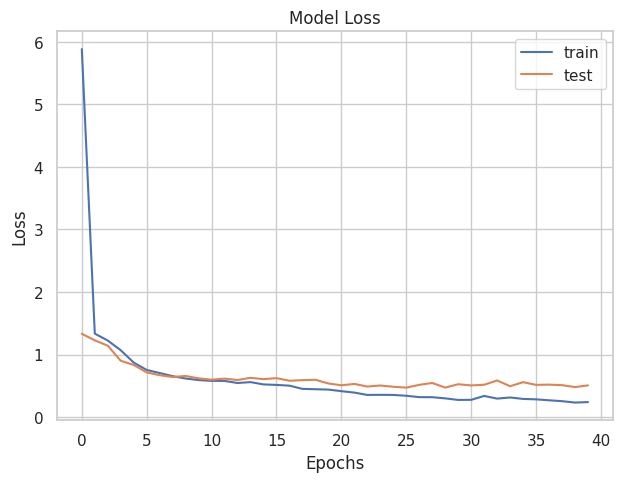

In [54]:
plt.plot(this_hist.history['loss'])
plt.plot(this_hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

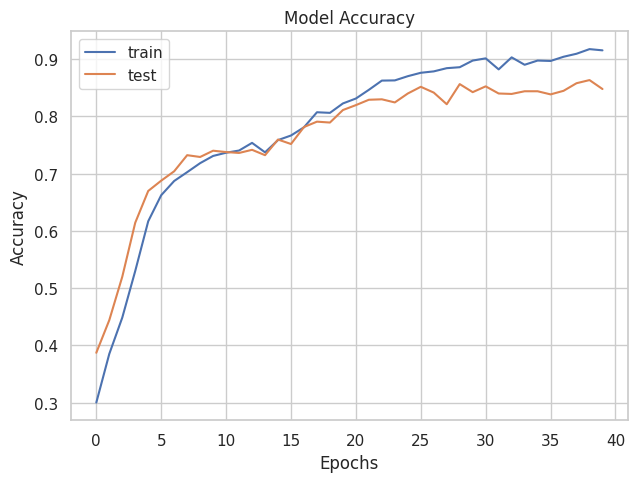

In [55]:
plt.plot(this_hist.history['accuracy'])
plt.plot(this_hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [56]:
# getting predictions on val set.
y_pred_test = this_model.predict(X_test_coded)
# get the predict result as label 0-5 from the highest marks
y_pred_test_labeled = np.argmax(y_pred_test, axis = 1)
#convert into binary
#y_pred_coded=to_categorical(y_pred_labeled,5)

# convert the y_test from flower type str to label 0-5
le = LabelEncoder()
y_test_labeled = le.fit_transform(y_test)

41/41 [==============================] - 5s 123ms/step


In [57]:
# getting predictions on val set.
y_pred_train = this_model.predict(X_train_coded)
# get the predict result as label 0-5 from the highest marks
y_pred_train_labeled = np.argmax(y_pred_train, axis = 1)

94/94 [==============================] - 12s 124ms/step


In [58]:
# now storing some properly as well as misclassified indexes'.
i = 0
prop_class = []
mis_class = []

for i in range(len(y_test_coded)):
    if(y_test_labeled[i] == y_pred_test_labeled[i]):
        if(len(prop_class) < 8):
            prop_class.append(i)
    else:
        if(len(mis_class) < 8):
            mis_class.append(i)

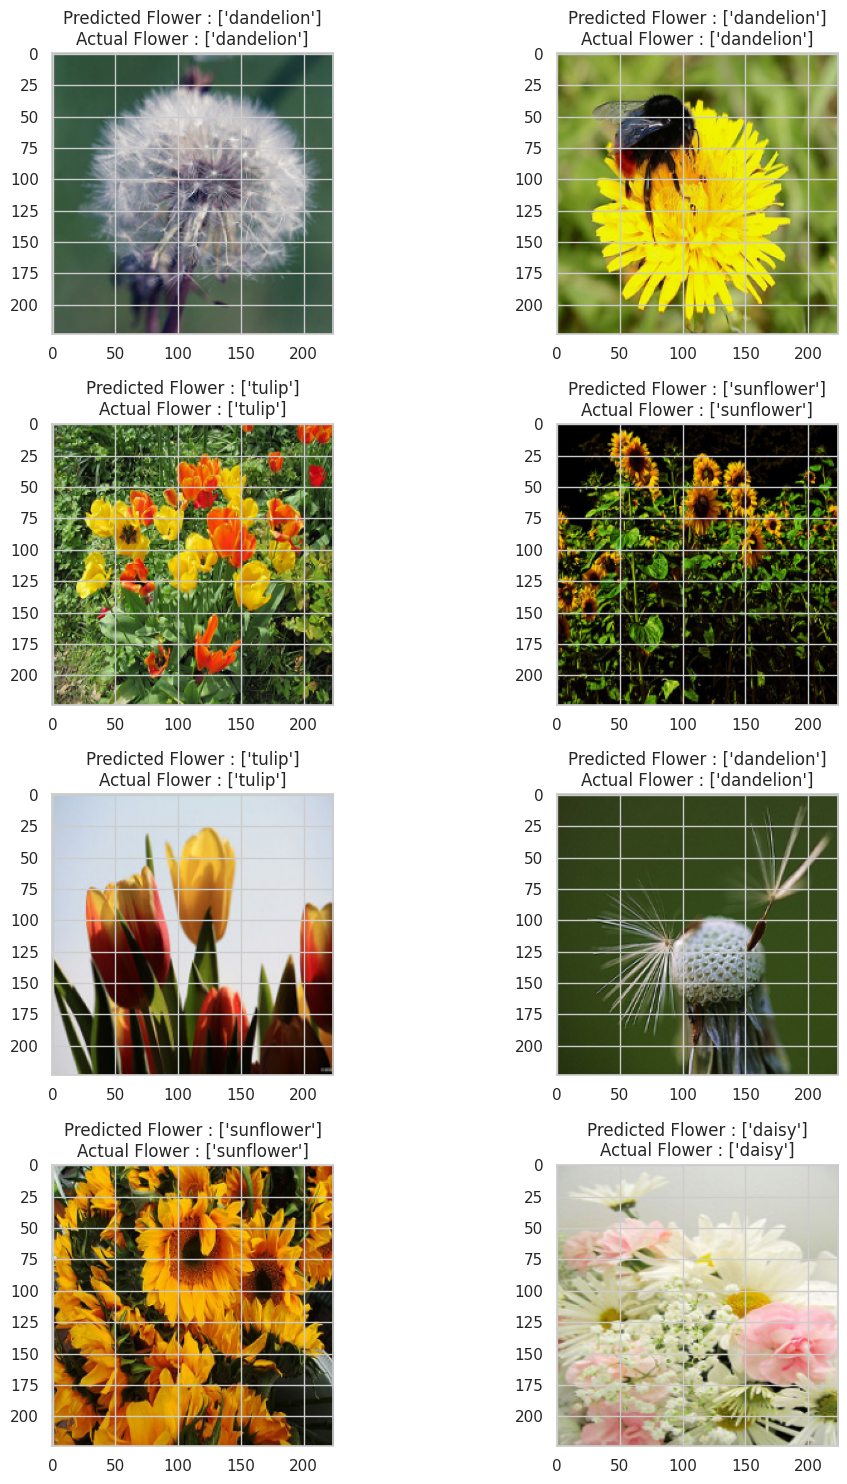

In [59]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count = 0
fig,ax=plt.subplots(4, 2)
fig.set_size_inches(15, 15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(X_test_coded[prop_class[count]][:, :, [2, 1, 0]])
        ax[i,j].set_title("Predicted Flower : "+ str(le_test.inverse_transform([y_pred_test_labeled[prop_class[count]]])) + "\n" + "Actual Flower : " + str(le_test.inverse_transform([np.argmax([y_test_coded[prop_class[count]]])])))
        plt.tight_layout()
        count += 1

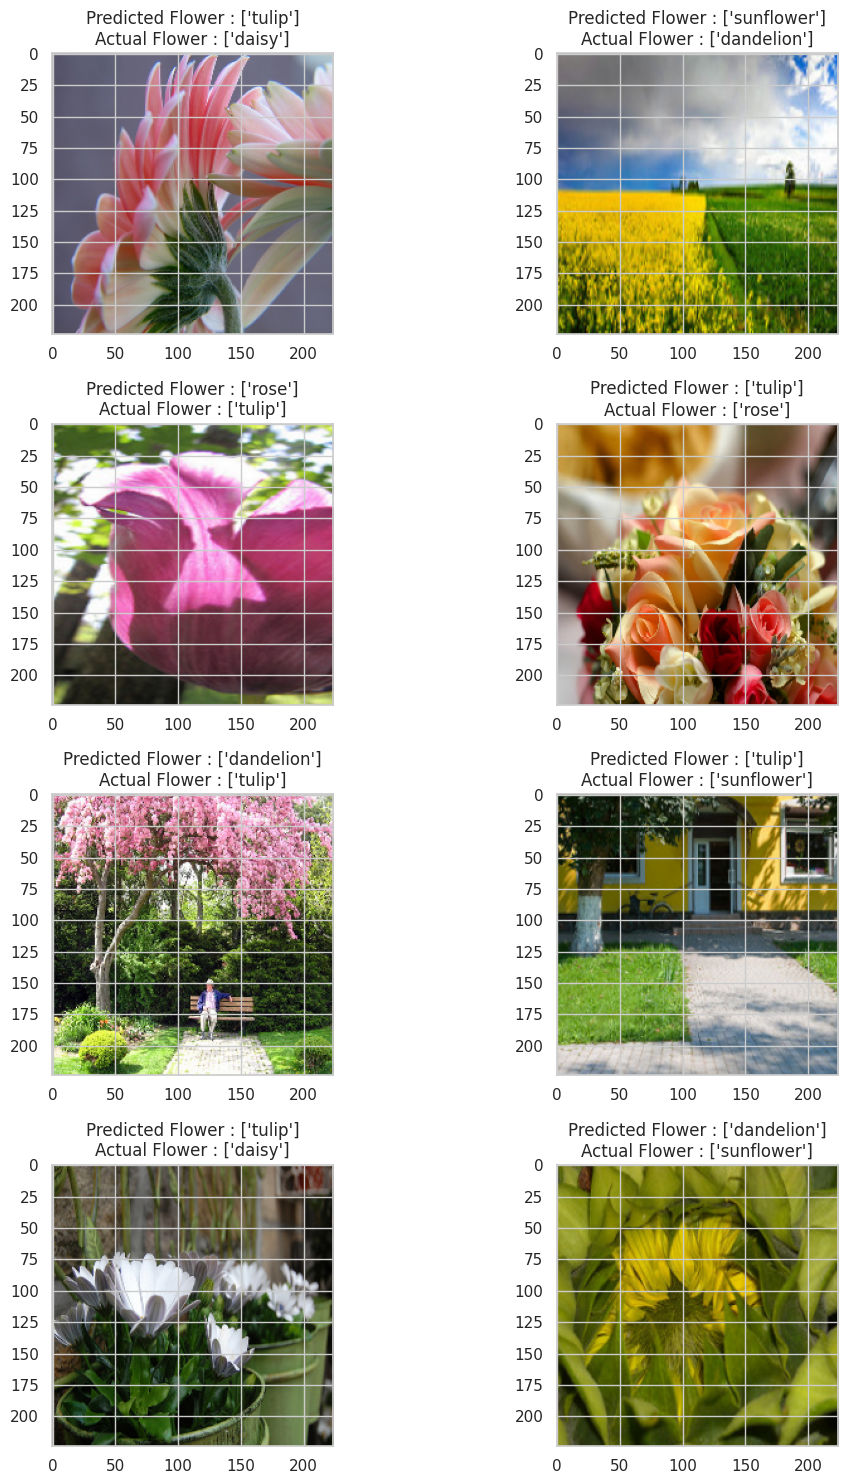

In [60]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count = 0
fig,ax = plt.subplots(4, 2)
fig.set_size_inches(15, 15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(X_test_coded[mis_class[count]][:, :, [2, 1, 0]])
        ax[i,j].set_title("Predicted Flower : " + str(le_test.inverse_transform([y_pred_test_labeled[mis_class[count]]])) + "\n"+"Actual Flower : " + str(le_test.inverse_transform([np.argmax([y_test_coded[mis_class[count]]])])))
        plt.tight_layout()
        count += 1

In [61]:
y_train_labeled

array([3, 1, 3, ..., 3, 4, 1])

Text(0.5, 1.0, '[Flower Recognition] Confusion Matrix of Training Datasets Prediction, by using HPO-TPE')

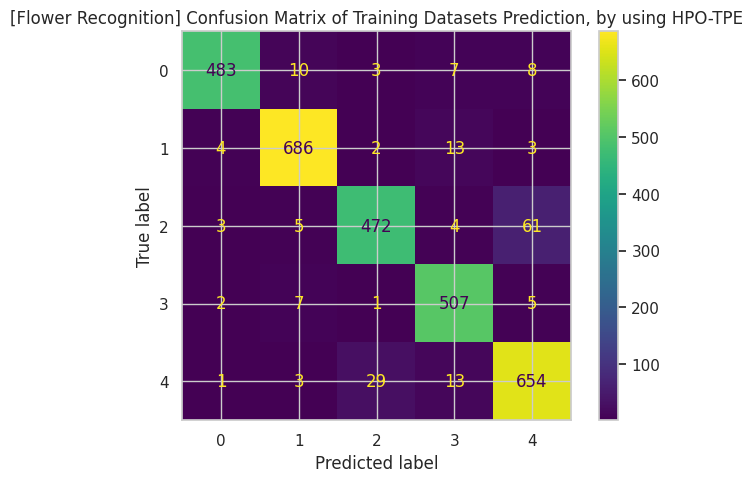

In [62]:
cm_train = confusion_matrix(y_train_labeled,y_pred_train_labeled)
disp_train = ConfusionMatrixDisplay(confusion_matrix = cm_train )

disp_train.plot()
disp_train.ax_.set_title("[Flower Recognition] Confusion Matrix of Training Datasets Prediction, by using HPO-TPE")

Text(0.5, 1.0, '[Flower Recognition] Heatmap of Training Datasets Prediction, by using HPO-TPE')

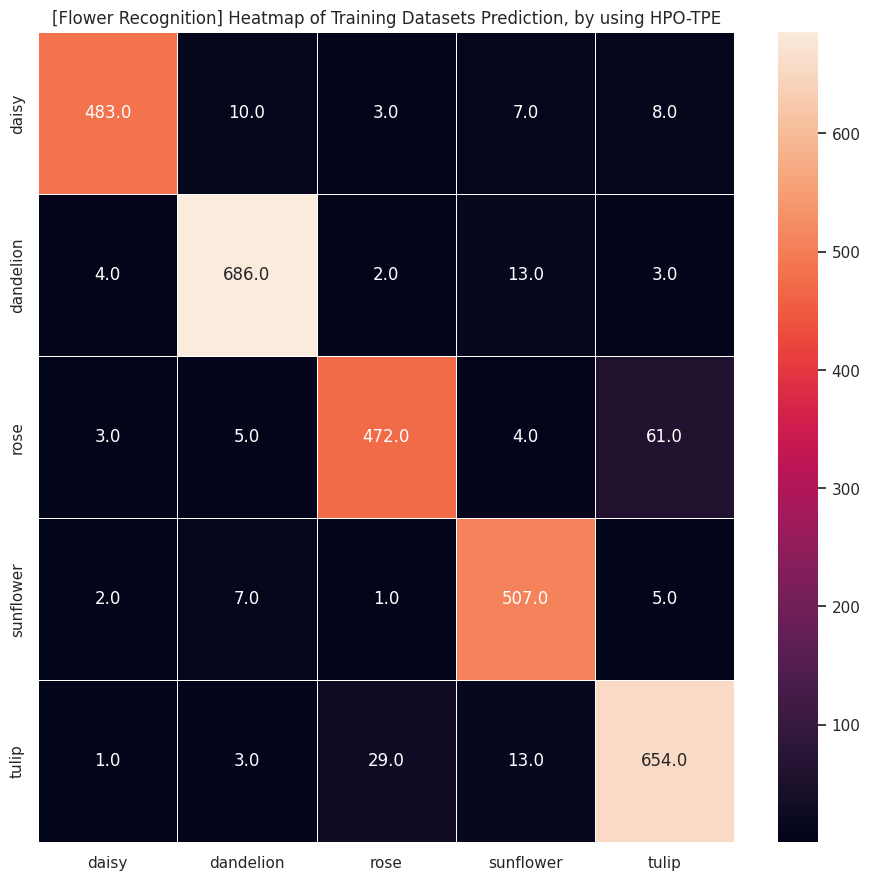

In [63]:
plt.figure(figsize = (10, 10))
sns.heatmap(cm_train, annot = True, fmt = ".1f", linewidth = .5, xticklabels = flower_name_list, yticklabels =  flower_name_list)
plt.title("[Flower Recognition] Heatmap of Training Datasets Prediction, by using HPO-TPE")

Text(0.5, 1.0, '[Flower Recognition] Confusion Matrix of Test Datasets Prediction, by using HPO-TPE')

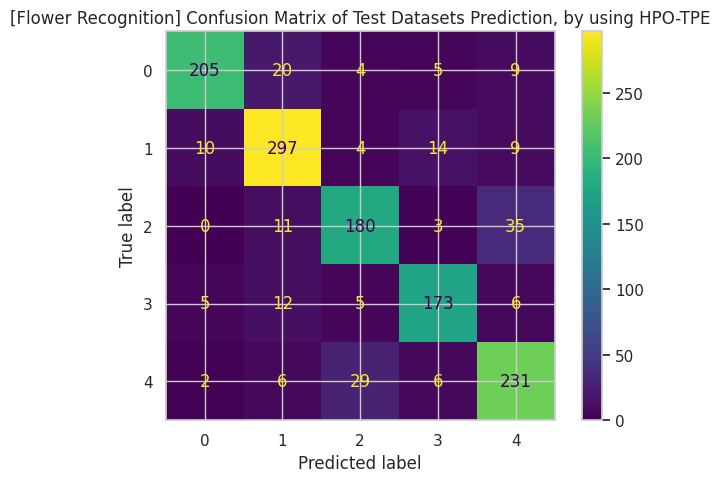

In [64]:
cm_test = confusion_matrix(y_test_labeled,y_pred_test_labeled)
disp_test = ConfusionMatrixDisplay(confusion_matrix = cm_test )

disp_test.plot()
disp_test.ax_.set_title("[Flower Recognition] Confusion Matrix of Test Datasets Prediction, by using HPO-TPE")

Text(0.5, 1.0, '[Flower Recognition] Heatmap of Test Datasets Prediction, by using HPO-TPE')

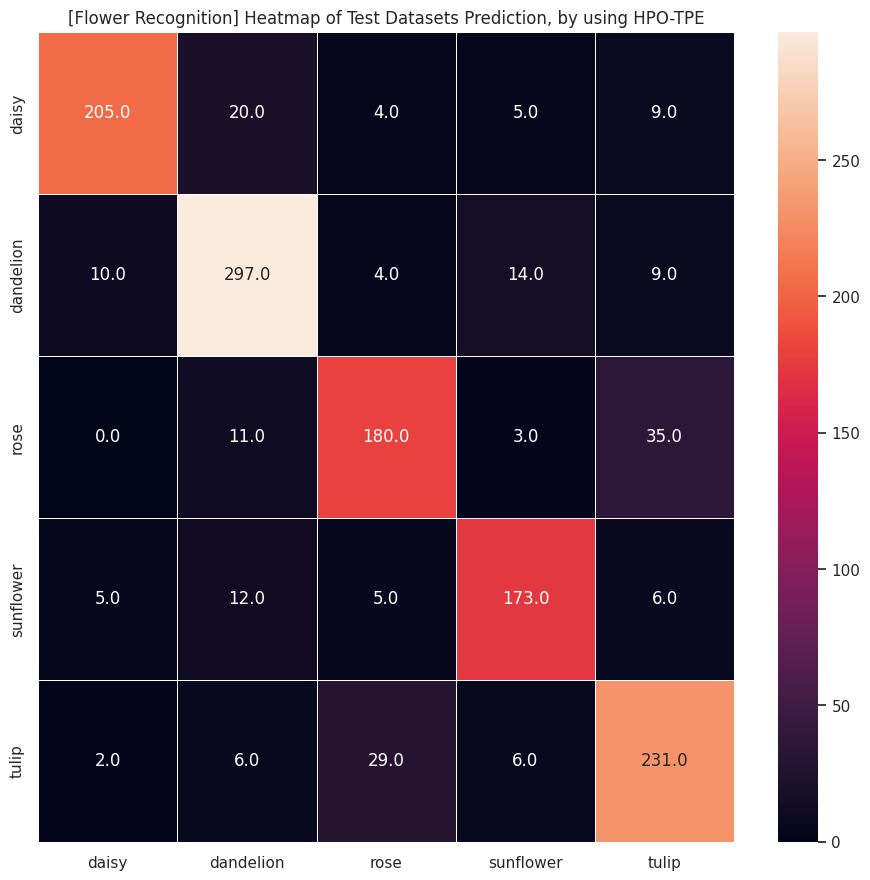

In [65]:
plt.figure(figsize = (10, 10))
sns.heatmap(cm_test, annot = True, fmt = ".1f", linewidth = .5, xticklabels = flower_name_list, yticklabels = flower_name_list)
plt.title("[Flower Recognition] Heatmap of Test Datasets Prediction, by using HPO-TPE")

In [66]:
print("[Flower Recognition] Classification Repot of Test Datasets Prediction, by using HPO-TPE\r\n")
print(classification_report(y_test_labeled, y_pred_test_labeled, target_names = flower_name_list))

[Flower Recognition] Classification Repot of Test Datasets Prediction, by using HPO-TPE

              precision    recall  f1-score   support

       daisy       0.92      0.84      0.88       243
   dandelion       0.86      0.89      0.87       334
        rose       0.81      0.79      0.80       229
   sunflower       0.86      0.86      0.86       201
       tulip       0.80      0.84      0.82       274

    accuracy                           0.85      1281
   macro avg       0.85      0.84      0.85      1281
weighted avg       0.85      0.85      0.85      1281



In [41]:
'''
acc = accuracy_score(y_test_labeled, y_pred_labeled)
print(acc)
prec = precision_score(y_test_labeled, y_test_labeled, average='weighted')
print(prec)
recall = recall_score(y_test_labeled, y_pred_labeled, average='weighted')
print(recall)
f1 = f1_score(y_test_labeled, y_pred_labeled, average='weighted')
print(f1)
'''

#confusion_matrix = confusion_matrix
print("[Flower Recognition] Scores Repot of Test Datasets Prediction, by using HPO-TPE\r\n")
print('accuracy: %s'%accuracy_score(y_test_labeled, y_pred_test_labeled))
print('precision: %s'%precision_score(y_test_labeled, y_test_labeled, average = 'weighted'))
print('recall: %s'%recall_score(y_test_labeled, y_pred_test_labeled, average = 'weighted'))
print('f1: %s'%f1_score(y_test_labeled, y_pred_test_labeled, average = 'weighted'))

[Flower Recognition] Scores Repot of Test Datasets Prediction, by using HPO-TPE

accuracy: 0.8540202966432474
precision: 1.0
recall: 0.8540202966432474
f1: 0.8540273127718788
